In [1]:
import shutil
from pathlib import Path

from common.log_utils import enable_debug_logging
from datagen.env_helper import display_video
from datagen.generate_worlds import generate_worlds
from datagen.world_creation.constants import AvalonTask
from datagen.world_creation.heightmap import DebugVisualizationConfig
from datagen.world_creation.visual_utils import visualize_worlds_in_folder

enable_debug_logging()

NUM_WORLDS = 1
# if True, will visualize 2d top down graphs of all worlds but will run slower as it will generate worlds in order
IS_GRAPH_MODE = False


tasks = [
    # AvalonTask.SURVIVE,
    # AvalonTask.THROW,
    # AvalonTask.CARRY,
    # needs to be tested:
    # AvalonTask.DESCEND,
    # AvalonTask.HUNT,
    # AvalonTask.FIGHT,
    # AvalonTask.AVOID,
    # AvalonTask.FIND,
    # AvalonTask.EXPLORE,
    # AvalonTask.SCRAMBLE,
    AvalonTask.NAVIGATE,
    # AvalonTask.GATHER,
    # AvalonTask.OPEN,
    # AvalonTask.EAT,
    # AvalonTask.MOVE,
    # AvalonTask.JUMP,
    # AvalonTask.CLIMB,
    # AvalonTask.STACK,
    # AvalonTask.BRIDGE,
    # AvalonTask.PUSH,
]


base_output_path = Path("/tmp/levels/visualize/")
if base_output_path.exists():
    shutil.rmtree(base_output_path)
base_output_path.mkdir(parents=True, exist_ok=True)

In [2]:

actual_worlds = generate_worlds(
    base_output_path=base_output_path,
    tasks=tasks,
    num_worlds_per_task=NUM_WORLDS,
    start_seed=0,
    is_practice=False,
    min_difficulty=0.0,
    is_recreating=True,
    debug_visualization_config=DebugVisualizationConfig(is_2d_graph_drawn=IS_GRAPH_MODE),
    is_async=not IS_GRAPH_MODE,
)

Finished generating navigate__1__0_0
Finished generating 1 of 1 worlds in 0.03 minutes


Worker (PID=204):  process group: /opt/projects/avalon/datagen/godot/datagen.sh --thread_count=4 -U --input_pipe_path=/mnt/private/tmp/5b361e2e-d830-4f30-bbee-734c449ef292/godot.log.actions --output_pipe_path=/mnt/private/tmp/5b361e2e-d830-4f30-bbee-734c449ef292/godot.log.observations --cuda-gpu-id=0 /mnt/private/data/interactive/8610eafc-e9f0-4fc8-a9e5-edcd2dcb9270/config.json' &>> /mnt/private/tmp/5b361e2e-d830-4f30-bbee-734c449ef292/godot.log
Worker (PID=204):  TO DEBUG RUN: /opt/projects/avalon/datagen/godot/datagen.sh --thread_count=4 -U --input_pipe_path=/mnt/private/data/interactive/8610eafc-e9f0-4fc8-a9e5-edcd2dcb9270/actions.out --output_pipe_path=/tmp/debug_output --cuda-gpu-id=0 /mnt/private/data/interactive/8610eafc-e9f0-4fc8-a9e5-edcd2dcb9270/config.json
Loading /tmp/levels/visualize/navigate__1__0_0


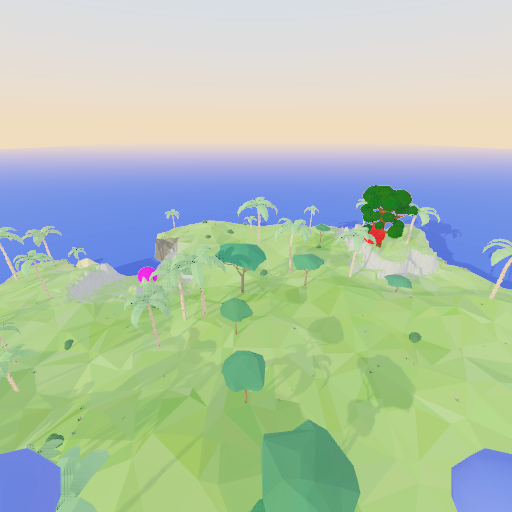

In [3]:

NUM_ACTIONS = 20
RESOLUTION = 512

all_observations = visualize_worlds_in_folder(base_output_path, RESOLUTION, NUM_ACTIONS)

for obs in all_observations:
    display_video(obs, size=(RESOLUTION, RESOLUTION))